# Importing necessary Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
iris='iris.csv'
names=['sepal_length','sepal_width','petal_length','petal_width','class']
data=pd.read_csv(iris,names=names)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=data.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Dimensions of dataset
df.shape

(150, 5)

In [6]:
# Statistical Summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Class Distribution
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

In [8]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

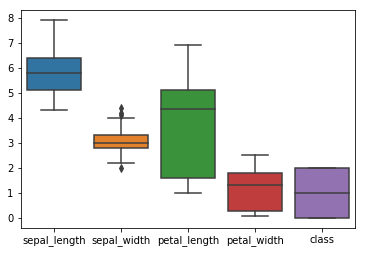

In [9]:
# data visualization
import seaborn as sns
sns.boxplot(data=df)

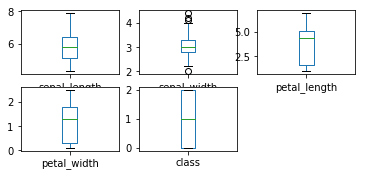

In [10]:
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

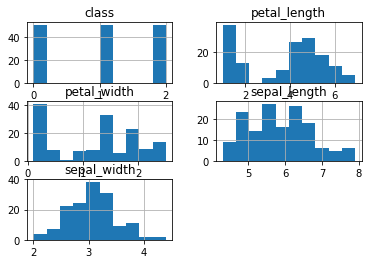

In [11]:
#histogram
df.hist()
plt.show()

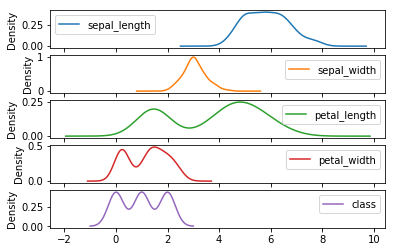

In [12]:
df.plot(kind='density',subplots=True)
plt.show()

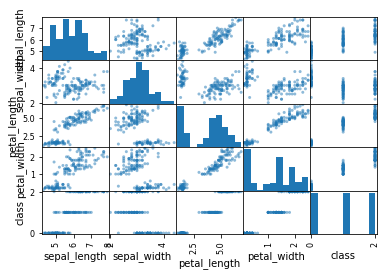

In [21]:
scatter_matrix(df)
plt.show()

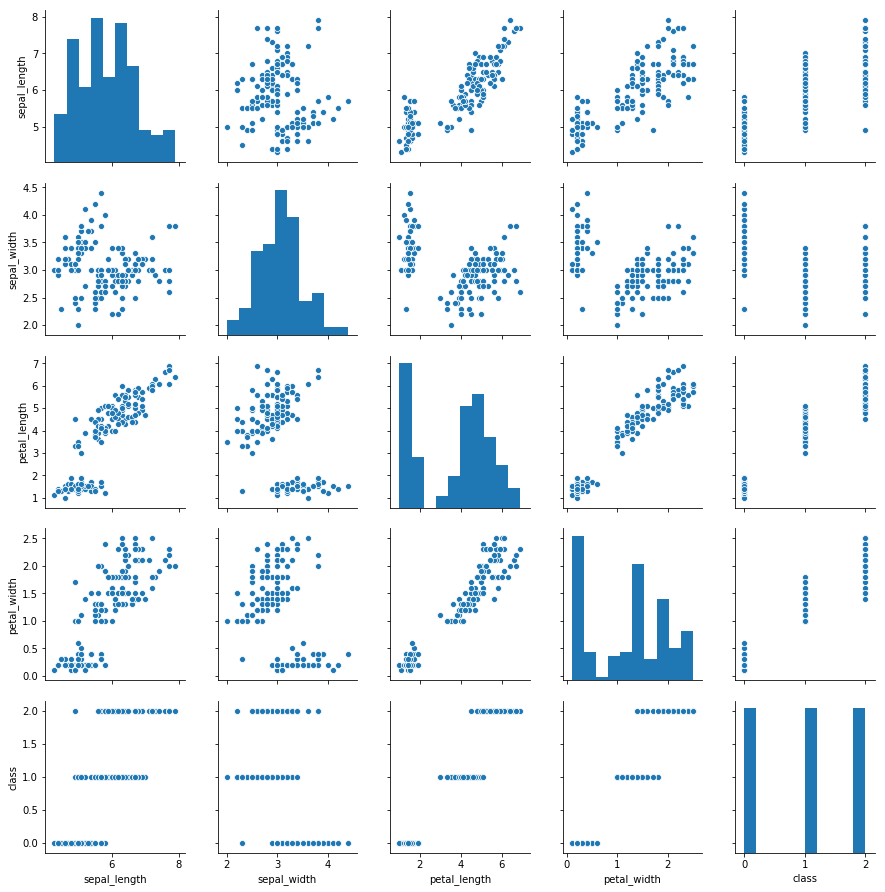

In [14]:
sns.pairplot(df)

In [15]:
# create a validation dataset
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

# Building some Models with pipe line method

In [26]:
#spot Check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f(%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.966667(0.040825)
LDA: 0.975000(0.038188)
KNN: 0.983333(0.033333)
CART: 0.966667(0.040825)
NB: 0.975000(0.053359)
SVM: 0.991667(0.025000)


In [27]:
# make predictions

svc=SVC().fit(x_train,y_train)
predictions=svc.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

